In [1]:
import arff
import pandas as pd

# Load the ARFF file
data = list(arff.load('solar-flare_2.arff'))  # Convert generator to list

# Convert ARFF data to a pandas DataFrame
rows = [list(row) for row in data]
df = pd.DataFrame(rows)

df.to_csv('solar-flare_2.csv', index=False)

Description
Author: Gary Bradshaw
Source: UCI
Please cite:

Solar Flare database Relevant Information: -- The database contains 3 potential classes, one for the number of times a certain type of solar flare occured in a 24 hour period. -- Each instance represents captured features for 1 active region on the sun. -- The data are divided into two sections. The second section (flare.data2) has had much more error correction applied to the it, and has consequently been treated as more reliable.

Number of Instances: flare.data1: 323, flare.data2: 1066

Number of attributes: 13 (includes 3 class attributes)

Attribute Information
1. Code for class (modified Zurich class)  (A,B,C,D,E,F,H)
2. Code for largest spot size              (X,R,S,A,H,K)
3. Code for spot distribution              (X,O,I,C)
4. Activity                                (1 = reduced, 2 = unchanged)
5. Evolution                               (1 = decay, 2 = no growth, 
                                            3 = growth)
6. Previous 24 hour flare activity code    (1 = nothing as big as an M1,
                                            2 = one M1,
                                            3 = more activity than one M1)
7. Historically-complex                    (1 = Yes, 2 = No)
8. Did region become historically complex  (1 = yes, 2 = no) 
   on this pass across the sun's disk
9. Area                                    (1 = small, 2 = large)
10. Area of the largest spot (1 = <=5, 2 = >5)

From all these predictors three classes of flares are predicted, which are represented in the last three columns.

C-class flares production by this region Number
in the following 24 hours (common flares)
M-class flares production by this region Number in the following 24 hours (moderate flares)
X-class flares production by this region Number in the following 24 hours (severe flares)
CLASSTYPE: nominal CLASSINDEX: first

13 Features
Feature Name	Type	Distinct/Missing Values	Ontology
class (target)	nominal	6 distinct values
0 missing attributes	
largest_spot_size	nominal	6 distinct values
0 missing attributes	
spot_distribution	nominal	4 distinct values
0 missing attributes	
Activity	nominal	2 distinct values
0 missing attributes	
Evolution	nominal	3 distinct values
0 missing attributes	
Previous_24_hour_flare_activity_code	nominal	3 distinct values
0 missing attributes	
Historically-complex	nominal	2 distinct values
0 missing attributes	

In [2]:
# Converts the DF of strings to Integers
# Data Cleaning Set
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.median()).astype("Int64")  # Replace NaNs with median values

In [3]:
# drop last three columns
df = df.drop(df.columns[-3:], axis=1)

Part 2: Unsupervised Learning (Data Analysis and Pattern Recognition)
1. Objectives:
o Explore patterns using unsupervised methods.
o Test and compare various dimensionality reduction (≥5) and clustering (≥3)
techniques.
2. Deliverables:
o Preprocessing code tailored to the dataset.
o Implementation of DR and clustering methods.
o Annotated Jupyter Notebook with results and insights.
o Relate clustering results to real-world interpretability based on the dataset
domain.
o A 1-page summary discussing findings and comparisons.

In [4]:
# Five Dimensionality Reduction Techniques
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding

PCA_df = PCA(n_components=2).fit_transform(df)
TSNE_df = TSNE(n_components=2).fit_transform(df)
MDS_df = MDS(n_components=4).fit_transform(df)
Isomap_df = Isomap(n_components=2).fit_transform(df)
LLE_df = LocallyLinearEmbedding(n_components=2).fit_transform(df)


/Users/petervallet/PycharmProjects/apc/.venv/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/petervallet/PycharmProjects/apc/.venv/lib/python3.9/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/petervallet/PycharmProjects/apc/.venv/lib/python3.9/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/petervallet/PycharmProjects/apc/.venv/lib/python3.9/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr

In [5]:
# Comparison of DR Techniques performance
from sklearn.cluster import KMeans

KMeans_PCA_df = KMeans(n_clusters=3).fit_predict(PCA_df)
KMeans_TSNE_df = KMeans(n_clusters=3).fit_predict(TSNE_df)
KMeans_MDS_df = KMeans(n_clusters=3).fit_predict(MDS_df)
KMeans_Isomap_df = KMeans(n_clusters=3).fit_predict(Isomap_df)
KMeans_LLE_df = KMeans(n_clusters=3).fit_predict(LLE_df)

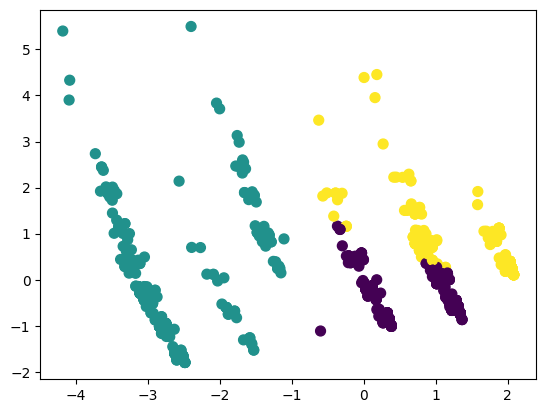

In [6]:
import matplotlib.pyplot as plt
plt.scatter(PCA_df[:, 0], PCA_df[:, 1], c=KMeans_PCA_df, s=50, cmap='viridis')
plt.show()

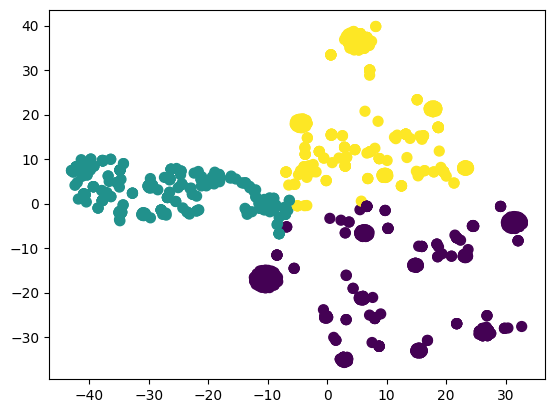

In [7]:
import matplotlib.pyplot as plt
plt.scatter(TSNE_df[:, 0], TSNE_df[:, 1], c=KMeans_TSNE_df, s=50, cmap='viridis')
plt.show()

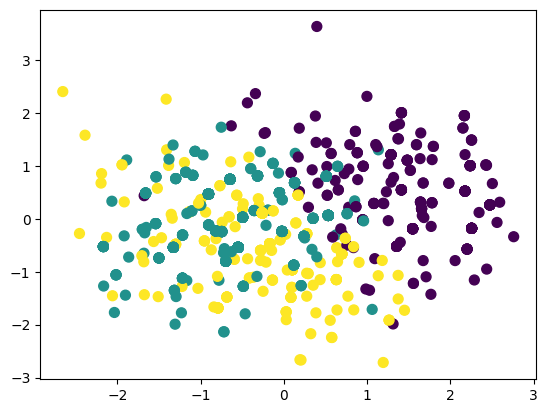

In [8]:
import matplotlib.pyplot as plt
plt.scatter(MDS_df[:, 0], MDS_df[:, 1], c=KMeans_MDS_df, s=50, cmap='viridis')
plt.show()

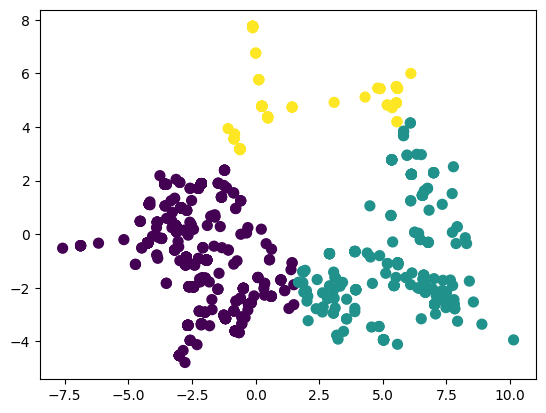

In [9]:
import matplotlib.pyplot as plt
plt.scatter(Isomap_df[:, 0], Isomap_df[:, 1], c=KMeans_Isomap_df, s=50, cmap='viridis')
plt.show()

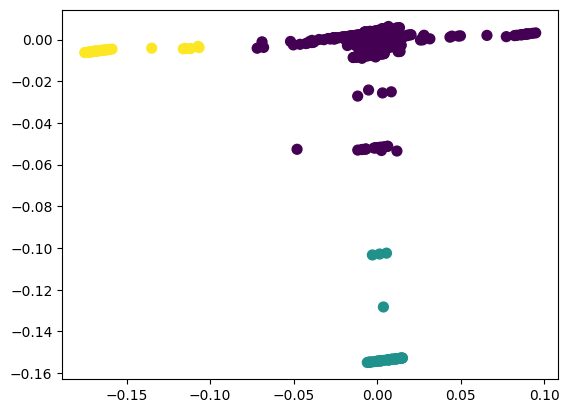

In [10]:
import matplotlib.pyplot as plt
plt.scatter(LLE_df[:, 0], LLE_df[:, 1], c=KMeans_LLE_df, s=50, cmap='viridis')
plt.show()

In [25]:
# Three Clustering Techniques
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

KMeans_df = KMeans(n_clusters=3).fit_predict(PCA_df)
Agglomerative_df = AgglomerativeClustering(n_clusters=3).fit_predict(PCA_df)
DBSCAN_df = DBSCAN(eps=0.5, min_samples=5).fit_predict(PCA_df)

# Comparison of Clustering Techniques performance
# There exists three classes of flares, so the number of real identified clusters is 3


In [26]:
from sklearn.metrics import silhouette_score

# Function to calculate silhouette score
def calculate_silhouette(data, labels):
    score = silhouette_score(data, labels)
    return score

# Calculate silhouette scores for each clustering technique
silhouette_scores = {
    'KMeans': calculate_silhouette(PCA_df, KMeans_df),
    'Agglomerative': calculate_silhouette(PCA_df, Agglomerative_df),
    'DBSCAN': calculate_silhouette(PCA_df, DBSCAN_df)
}

# Print the silhouette scores
for method, score in silhouette_scores.items():
    print(f'Silhouette Score for {method}: {score}')

Silhouette Score for KMeans: 0.4693245024321064
Silhouette Score for Agglomerative: 0.5974765648747353
Silhouette Score for DBSCAN: 0.41967711646548234


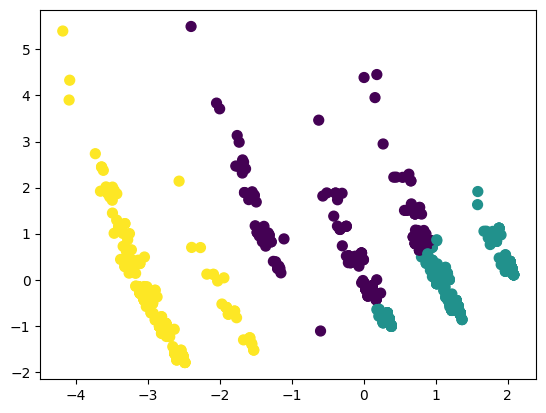

In [12]:
import matplotlib.pyplot as plt
plt.scatter(PCA_df[:, 0], PCA_df[:, 1], c=KMeans_df, s=50, cmap='viridis')
plt.show()

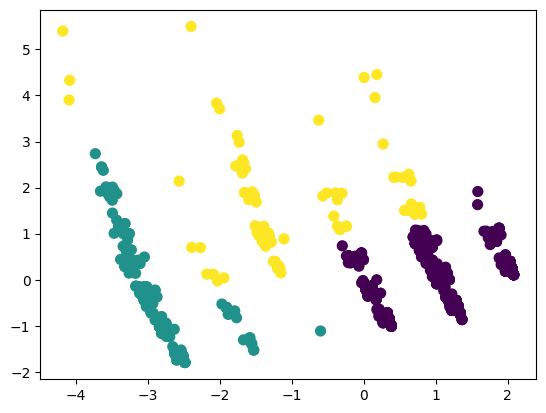

In [13]:
import matplotlib.pyplot as plt
plt.scatter(PCA_df[:, 0], PCA_df[:, 1], c=Agglomerative_df, s=50, cmap='viridis')
plt.show()

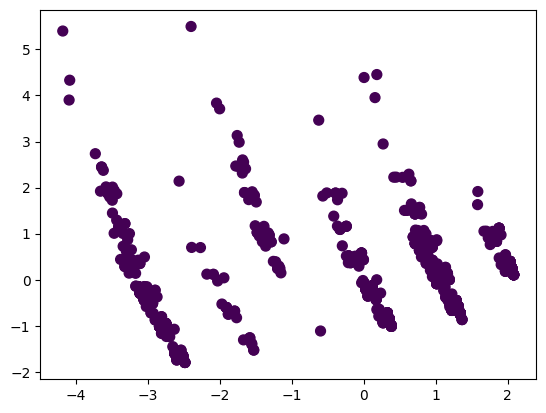

In [14]:
import matplotlib.pyplot as plt
plt.scatter(PCA_df[:, 0], PCA_df[:, 1], c=DBSCAN_df, s=50, cmap='viridis')
plt.show()

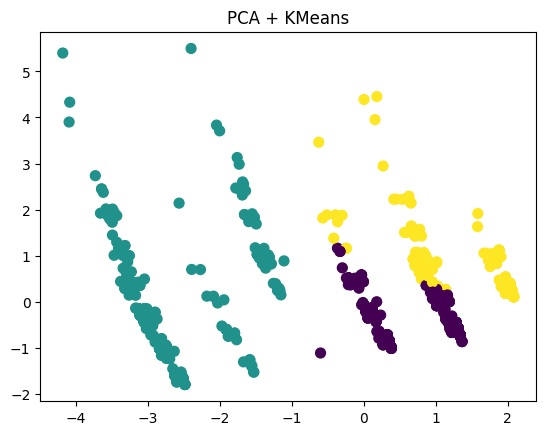

Silhouette Score for PCA + KMeans: 0.4693245024321064


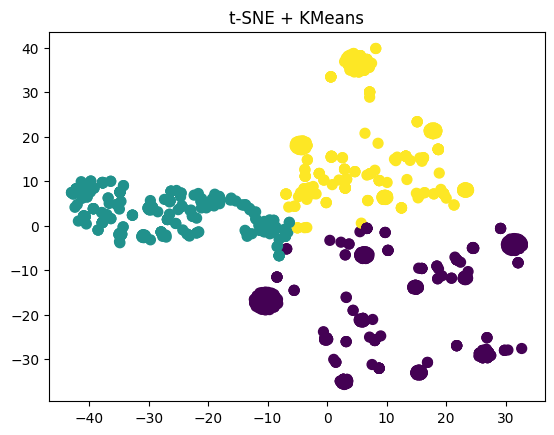

Silhouette Score for t-SNE + KMeans: 0.4672468304634094


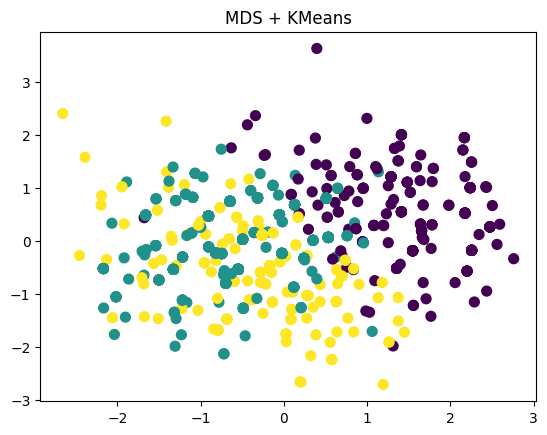

Silhouette Score for MDS + KMeans: 0.32129999588259744


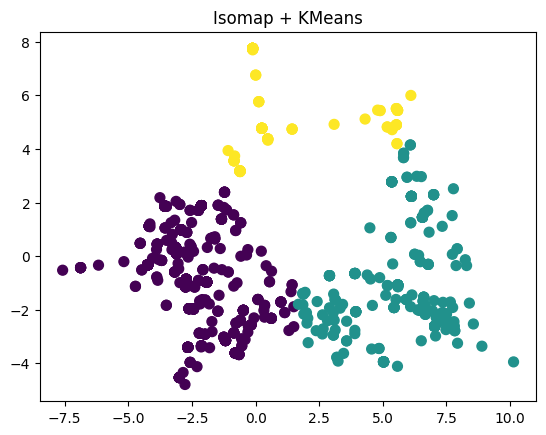

Silhouette Score for Isomap + KMeans: 0.5784809663069737


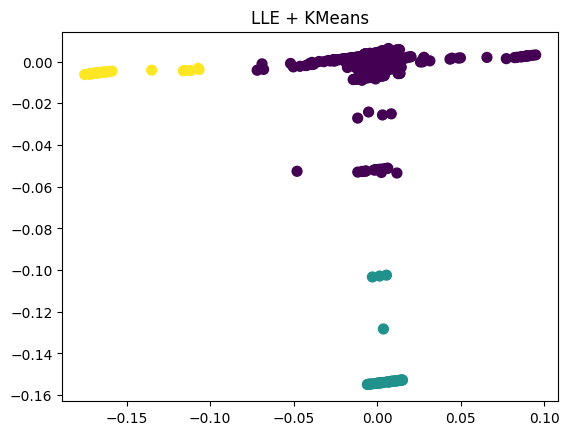

Silhouette Score for LLE + KMeans: 0.8943841582708959


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to plot clusters
def plot_clusters(data, labels, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(title)
    plt.show()

# Function to calculate silhouette score
def calculate_silhouette(data, labels):
    score = silhouette_score(data, labels)
    return score

# Plot and evaluate clusters for each combination
combinations = [
    (PCA_df, KMeans_PCA_df, 'PCA + KMeans'),
    (TSNE_df, KMeans_TSNE_df, 't-SNE + KMeans'),
    (MDS_df, KMeans_MDS_df, 'MDS + KMeans'),
    (Isomap_df, KMeans_Isomap_df, 'Isomap + KMeans'),
    (LLE_df, KMeans_LLE_df, 'LLE + KMeans')
]

for data, labels, title in combinations:
    plot_clusters(data, labels, title)
    score = calculate_silhouette(data, labels)
    print(f'Silhouette Score for {title}: {score}')

Part 3: Supervised Learning (Classification and/ or Regression)
1. Objectives:
o Develop and evaluate two models; either classification models or regression
models depending on your use case.
1. Some classification models could be Artificial Neural Networks (ANN)
and Support Vector Machines (SVM) [not limited to these].
2. Some regression models could be Random Forest or Gradient Boosting
[not limited to these].
3. Packages like scikit-learn have algorithms that you can use.
o Compare the effectiveness of the models using different preprocessing techniques
and hyperparameter tuning.
2. Deliverables:
o Preprocessing code specific to the supervised task.
o Implementations of two predictive models.
o Annotated Jupyter Notebook showcasing experiments and analyses.
o A 1-page summary of findings, including a performance comparison between the
models.


In [15]:
# reimport the csv
import arff
import pandas as pd

# Load the ARFF file
data = list(arff.load('solar-flare_2.arff'))  # Convert generator to list

# Convert ARFF data to a pandas DataFrame
rows = [list(row) for row in data]
df = pd.DataFrame(rows)

df.to_csv('solar-flare_2.csv', index=False)

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,3,1,3,1,1,1,1,1,0,0,0,5
1,3,2,1,3,1,1,2,1,1,0,0,0,2
2,4,2,1,3,1,1,2,1,1,0,0,0,1
3,3,3,1,2,1,1,1,1,1,0,0,0,5
4,4,3,1,1,1,1,2,1,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,4,3,1,2,1,1,1,1,1,0,0,0,5
1062,4,3,2,2,1,1,2,1,1,0,0,0,5
1063,4,2,1,2,1,2,2,1,1,0,0,0,1
1064,3,3,1,2,1,1,2,1,1,0,0,0,5


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop(df.columns[-3:], axis=1)
y = df[df.columns[-3:]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.neural_network import MLPRegressor

# Create a neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [19]:
# Evaluate performance of regression
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")
mse


R² Score: 0.2725571127338397


0.1524807302439752

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Evaluate performance of regression
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")
mse

R² Score: 0.1853847742922762


0.16605011290853222

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (150, 150)],
    'max_iter': [500, 1000, 1500],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(MLPRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters for MLPRegressor: {best_params}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

Best parameters for MLPRegressor: {'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'max_iter': 500}
R² Score: 0.27817077531306594
Mean Squared Error: 0.15040810690265993


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters for RandomForestRegressor: {best_params}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

In [28]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Apply LLE to reduce the dimensionality of the dataset
lle = LocallyLinearEmbedding(n_components=4)
LLE_df = lle.fit_transform(df.drop(df.columns[-3:], axis=1))

# Split the reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(LLE_df, df[df.columns[-3:]], test_size=0.2, random_state=42)

# Define the parameter grid for MLPRegressor
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (150, 150)],
    'max_iter': [500, 1000, 1500],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create a GridSearchCV object for MLPRegressor
grid_search_mlp = GridSearchCV(MLPRegressor(random_state=42), param_grid_mlp, cv=3, scoring='neg_mean_squared_error')

# Fit the model
grid_search_mlp.fit(X_train, y_train)

# Get the best parameters and evaluate the model
best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print(f"Best parameters for MLPRegressor: {grid_search_mlp.best_params_}")
print(f"R² Score for MLPRegressor: {r2_mlp}")
print(f"Mean Squared Error for MLPRegressor: {mse_mlp}")

# Define the parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object for RandomForestRegressor
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and evaluate the model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Best parameters for RandomForestRegressor: {grid_search_rf.best_params_}")
print(f"R² Score for RandomForestRegressor: {r2_rf}")
print(f"Mean Squared Error for RandomForestRegressor: {mse_rf}")

/Users/petervallet/PycharmProjects/apc/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/petervallet/PycharmProjects/apc/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLPRegressor: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'max_iter': 1000}
R² Score for MLPRegressor: 0.08404136144385414
Mean Squared Error for MLPRegressor: 0.8304442890824587
Best parameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
R² Score for RandomForestRegressor: 0.1977415213026139
Mean Squared Error for RandomForestRegressor: 0.2652374737101293


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Apply LLE to reduce the dimensionality of the dataset
lle = LocallyLinearEmbedding(n_components=4)
LLE_df = lle.fit_transform(df.drop(df.columns[-3:], axis=1))

# Split the reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(LLE_df, df[df.columns[-3:]], test_size=0.2, random_state=42)

# Define a pipeline with scaling and MLPRegressor
pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(random_state=42))
])

# Define the parameter grid for MLPRegressor
param_grid_mlp = {
    'mlp__hidden_layer_sizes': [(50, 50), (100, 100), (150, 150)],
    'mlp__max_iter': [500, 1000, 1500],
    'mlp__alpha': [0.0001, 0.001, 0.01]
}

# Create a GridSearchCV object for MLPRegressor
grid_search_mlp = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=3, scoring='neg_mean_squared_error')

# Fit the model
grid_search_mlp.fit(X_train, y_train)

# Get the best parameters and evaluate the model
best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print(f"Best parameters for MLPRegressor: {grid_search_mlp.best_params_}")
print(f"R² Score for MLPRegressor: {r2_mlp}")
print(f"Mean Squared Error for MLPRegressor: {mse_mlp}")

# Define a pipeline with scaling and RandomForestRegressor
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Define the parameter grid for RandomForestRegressor
param_grid_rf = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object for RandomForestRegressor
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and evaluate the model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Best parameters for RandomForestRegressor: {grid_search_rf.best_params_}")
print(f"R² Score for RandomForestRegressor: {r2_rf}")
print(f"Mean Squared Error for RandomForestRegressor: {mse_rf}")

/Users/petervallet/PycharmProjects/apc/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/petervallet/PycharmProjects/apc/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/petervallet/PycharmProjects/apc/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/petervallet/PycharmProjects/apc/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the opt

Best parameters for MLPRegressor: {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (150, 150), 'mlp__max_iter': 1000}
R² Score for MLPRegressor: 0.16775326535696244
Mean Squared Error for MLPRegressor: 0.4874261442268159
Best parameters for RandomForestRegressor: {'rf__max_depth': 10, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}
R² Score for RandomForestRegressor: 0.24101555739507882
Mean Squared Error for RandomForestRegressor: 0.2188264727110487
